__Created By:__ Bailey Stephens <br>
__Creation Date:__ 2/23/2022

In [24]:
### Imports necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Calculating Uniform Density
Assuming that exoplanet GJ 436 b is perfectly spherical and has uniform density, then the density is simply given by

\begin{align*}
\rho = \frac{3 m}{4 \pi r^3}
\end{align*}

In previous code, we found the exoplanet we are choosing to study (GJ 436 b) has a radius of 0.326 $\pm$ 0.025 $R_\text{Jupiter}$ and a mass of 21.698 $\pm$ 0.587 $M_\oplus$. Using these values, calculating the average density of GJ 436 b should be fairly simple. However, it is important to understand how error propagates through this equation. In general, the uncertainty associated with some quantity Q given by

\begin{align*}
Q = \frac{a*b*\cdots*c}{x*y*\cdots*z}
\end{align*}

is calculated as

\begin{align*}
dQ = |Q|\sqrt{\left( \frac{\delta a}{a} \right)^2+\left( \frac{\delta b}{b} \right)^2 + \cdots + \left( \frac{\delta c}{c} \right)^2 + \left( \frac{\delta x}{x} \right)^2 + \left( \frac{\delta y}{y} \right)^2 + \cdots + \left( \frac{\delta z}{z} \right)^2}
\end{align*}

This gives us the uncertainty of two divided quantities, but we must also consider the uncertainty associated with cubing our radius. We can find this uncertainty by using the power formula that states that

\begin{align*}
\frac{\delta Q}{|Q|} = |n| \frac{\delta x}{|x|}
\end{align*}

We can now derive a general formula for the uncertainty in our density measurement. Let $dr$ be the uncertainty in our exoplanet's radius and $dm$ be the uncertainty in its mass, then

\begin{align*}
\delta (r^3) &= 3|r^3|\frac{dr}{r}
\end{align*}

and

\begin{align*}
\delta \rho &= \rho \sqrt{\left( \frac{\delta m}{m} \right)^2+\left( \frac{3|r^3|(dr/r)}{r^3} \right)^2} \\
&= \rho \sqrt{\left( \frac{\delta m}{m} \right)^2+\left( 3\frac{dr}{r} \right)^2}
\end{align*}

Using this and the above density equation, we can calculate the density of GJ 436 b as shown below.


In [25]:
exo_name = 'GJ 436 b'   ### Name of exoplanet
r_jupiter = 6.9911e9    ### Radius of Jupiter in cm
m_earth = 5.972e27      ### Mass of Earth in g

### Exoplanet radius / mass with uncertainties in CGS units
exo_radius = 0.339 * r_jupiter
radius_uncertainty = 0.015 * r_jupiter
exo_mass = 21.698 * m_earth
mass_uncertainty = 0.587 * m_earth

### Function with one return value
def ideal_density(mass, radius):
    """
    Calculates the average density of an approximately spherical
    exoplanet.
    
    Parameters:
    mass: Mass of the exoplanet
    radius: Radius of the exoplanet
    
    Outputs:
    density: Density of the exoplanet
    """
    
    return 3 * mass / (4 * np.pi * radius**3)

### Function with on return value
def ideal_uncertainty(density, radius, mass, dr, dm):
    """
    Calculates the uncertainty in an exoplanet's density.
    
    Parameters:
    density: Density of the exoplanet
    radius: Radius of the exoplanet
    mass: Mass of the exoplanet
    dr: Uncertainty in exoplanet's radius
    dm: Uncertainty in exoplanet's mass
    
    Outputs:
    dd: Uncertainty in the exoplanet's density
    """
    
    return density * np.sqrt((dr/radius)**2 + (3 * dm/mass)**2)

### Calculates the density of a given exoplanet, along with the associated uncertainty
d = round(ideal_density(exo_mass, exo_radius), 1)
u = round(ideal_uncertainty(d, exo_radius, exo_mass, radius_uncertainty, mass_uncertainty), 1)

### Prints calculated density
print("Exoplanet " + exo_name + " has a densit of " + str(d) + " +- " + str(u) + " g/cm^3")

Exoplanet GJ 436 b has a densit of 2.3 +- 0.2 g/cm^3


# Comparing To Exoplanet Data
### Preparing the Dataframe
We now wish to compare GJ 436 b's mass, radius, and density to similar exoplanets. To accomplish this, we must first load the data for all known exoplanets into a pandas dataframe. Since density is not provided in NASA's exoplanet data, it will be manually calculated using the reported exoplanet masses and radii. This means that any exoplanets without a reported mass or radius will be removed from the dataframe.

In [26]:
### Reads in .csv containing exoplanet data
pdat = pd.read_csv('PS_2022.02.20_09.02.17.csv', comment='#', usecols= ['pl_name','hostname', 'pl_bmasse', 'pl_radj'])

### Removes all rows with any missing masses / radii
pdat = pdat.dropna(axis=0, how='any')

### Calculates the density for each exoplanet in the dataframe
pdat['density'] = ideal_density(pdat['pl_bmasse'] * m_earth, pdat['pl_radj'] * r_jupiter)
pdat = pdat.dropna(axis=0, how='any')

### Prints a couple of example rows from the remaining dataframe
print("Length of dataframe:", len(pdat))
pdat.head(10)

Length of dataframe: 948


,pl_name,hostname,pl_radj,pl_bmasse,density
14,2MASS J02192210-3925225 b,2MASS J02192210-3925225,1.440,4417.83700,6.173293
18,2MASS J21402931+1625183 A b,2MASS J21402931+1625183 A,0.920,6657.48000,35.673115
31,55 Cnc e,55 Cnc,0.167,7.99000,7.158005
45,AU Mic b,AU Mic,0.363,17.00000,1.482940
46,AU Mic c,AU Mic,0.289,13.60000,2.350932
54,BD+20 594 b,BD+20 594,0.230,22.24810,7.629640
60,BD+60 1417 b,BD+60 1417,1.310,4767.42610,8.848400
74,CFHTWIR-Oph 98 b,CFHTWIR-Oph 98 A,1.860,2479.06157,1.607471
77,COCONUTS-2 b,COCONUTS-2 A,1.110,2002.31896,6.108843
78,CT Cha b,CT Cha,2.200,5403.00000,2.117198


Note that the above dataframe reports radii in terms of Jupiter radii and masses in terms of Earth masses. These are convenient values, since they are the same units GJ 436 b's mass and radius are reported in. Before we can plot these, we will limit the scope of our data to exoplanets with similar masses and radii to GJ 436 b. Our group determined that radii and masses that differ by 50% was sufficient.

In [27]:
exo_radius = 0.339    ### Radius of exoplanet in Jupiter radii
exo_mass = 21.698     ### Mass of exoplanet in Earth masses
percentage = 0.5      ### Percentage by which exoplanets can vary in mass / radius

### Declares the upper and lower limits of mass and radii to be plotted
upperMass = (1+percentage) * exo_mass
lowerMass = (1-percentage) * exo_mass
upperRadius = (1+percentage) * exo_radius
lowerRadius = (1-percentage) * exo_radius

### Copies our dataframe to a new variable
pdat_filt = pdat.copy()

### NOTE: The .drop() function makes this code slightly confusing. If the
###       condition is met, those rows are dropped. So, all values greater
###       or lower than limiting values are dropped
pdat_filt.drop(pdat_filt[pdat_filt['pl_bmasse'] > upperMass].index , inplace=True)
pdat_filt.drop(pdat_filt[pdat_filt['pl_bmasse'] < lowerMass].index , inplace=True)
pdat_filt.drop(pdat_filt[pdat_filt['pl_radj'] > upperRadius].index , inplace=True)
pdat_filt.drop(pdat_filt[pdat_filt['pl_radj'] < lowerRadius].index , inplace=True)

print("Length of dataframe:", len(pdat_filt))

Length of dataframe: 89


### Plotting the Data
We can now compare our exoplanet (GJ 436 b) to similar-sized exoplanets. The below code provides a couple of commented lines to allow the user to adjust the appearance of the plot. Option 1 allows for a user to change the background between black and white (NOTE: when using the black background, this cell may need to run twice). Option 2 provides two potential color maps for representing exoplanet density. Other color maps exist, but these two work with the white and black backgrounds. The final plot provides a way to compare the density of exoplanets similar in size to GJ 436 b. A star is used to represent GJ 436 b on the plot.

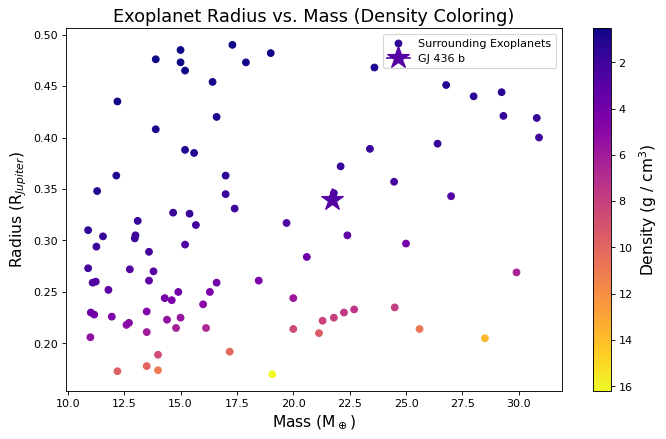

In [29]:
### Initializes the figure and some characteristics
figure(figsize=(10, 6), dpi=80)
ax = plt.gca()

### OPTION 1
#plt.style.use('dark_background')
plt.style.use('seaborn-bright')

### OPTION 2
### Determines the color map used for the scatter plot
#cmap = plt.cm.get_cmap('cool')
cmap = plt.cm.get_cmap('plasma')

### Calculates the density color value of GJ 436 b
density_min = pdat_filt['density'].min()
density_max = pdat_filt['density'].max()
rgba = cmap(d/(density_max-density_min))

### Creates labels for title and axes
plt.title('Exoplanet Radius vs. Mass (Density Coloring)', fontsize=16)
plt.xlabel('Mass (M$_\oplus$)', fontsize=14)
plt.ylabel('Radius (R$_{Jupiter}$)', fontsize=14)

### Plots surrounding exoplanet data
plt.scatter(pdat_filt['pl_bmasse'], pdat_filt['pl_radj'], c=pdat_filt['density'], cmap=cmap, label='Surrounding Exoplanets');

### Plots GJ 436 b
plt.plot(exo_mass, exo_radius, c=rgba, marker='*', markersize=21, label='GJ 436 b')

### Draws colorbar for scatter plot
cb = plt.colorbar()
cb.set_label(label='Density (g / cm$^{3}$)', fontsize=14)
cb.ax.invert_yaxis()

### Creates legend
ax.legend()

### Saves plot as .png
plt.savefig('density_comparison_wide.png')

# Comparing Results to Previous Works
There is a well-established relationship between an exoplanet's mass and radius (Chen & Kipping, 2016). This model is given by the following graphic: 
<br><br>

<div>
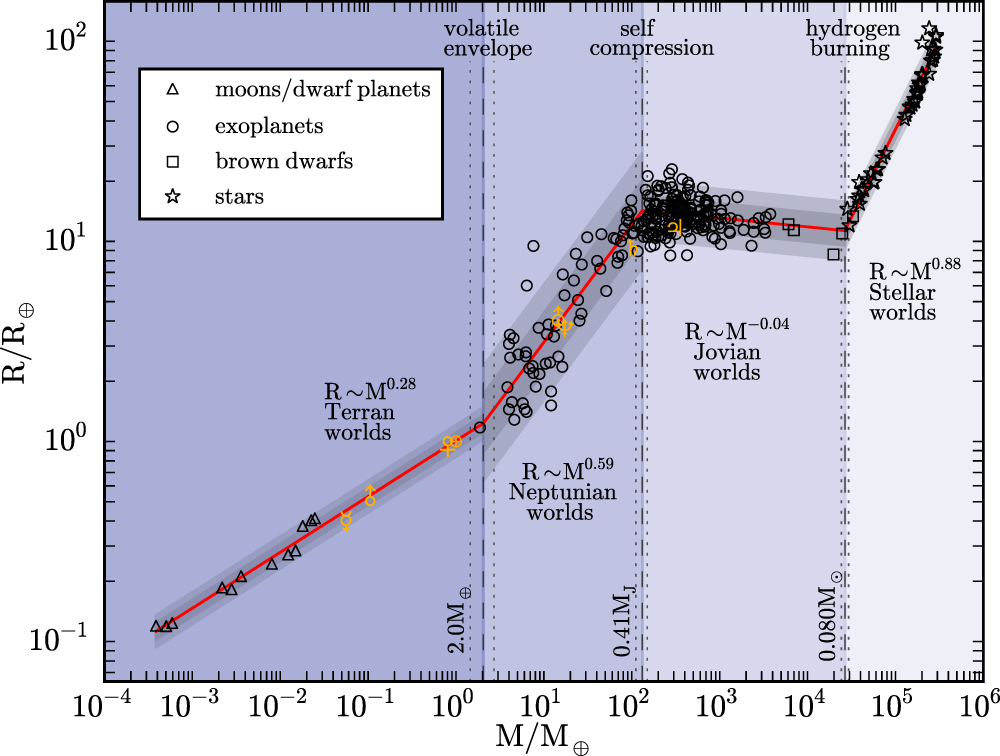
</div>

We see that GJ 436 b is classified as a Neptunian world on this graph, so its radius is approximated by

\begin{align*}
R_\text{exo} \approx R_\oplus \left( \frac{M_\text{exo}}{M_\oplus} \right)^{0.59}
\end{align*}

Since we have calculated values for the mass and radius of GJ 436 b, we can compare our values to this model.

In [22]:
### Exoplanet radius / mass in CGS units
exo_radius = 0.339 * r_jupiter
exo_mass = 21.698 * m_earth

### Earth radius / mass in CGS units
m_earth = 5.9721984208e+27
r_earth = 6.378e+8

### Calculates the uncertainty of radius from the Chen & Kipping model
frac_uncertainty = (exo_mass / m_earth) * np.sqrt((mass_uncertainty / exo_mass)**2)
power_uncertainty = 0.59 * frac_uncertainty**0.59 * (frac_uncertainty / (exo_mass / m_earth))
final_uncertainty = r_earth * (exo_mass / m_earth)**0.59 * np.sqrt((power_uncertainty / (exo_mass / m_earth)**0.59))

### Prints the calculated radii
print("OUR CALCULATED RADIUS:", exo_radius / r_jupiter, "+-", radius_uncertainty / r_jupiter ,"Jupiter radii")
print("PREDICTED RADIUS:", round((exo_mass / m_earth)**0.59 * r_earth / r_jupiter, 3), "+-", round(final_uncertainty / r_jupiter, 3), "Jupiter radii")

OUR CALCULATED RADIUS: 0.339 +- 0.015 Jupiter radii
PREDICTED RADIUS: 0.561 +- 0.024 Jupiter radii
